# Cats vs Dogs (Keras VGG16 model ) (Feature extraction with Data Augmentation and Fine Tuning) 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("./drive/My Drive")

In [0]:
base_dir = os.path.join('/content/drive/My Drive', 'cats_and_dogs_small')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
import keras
from keras.applications import VGG16

Using TensorFlow backend.


In [6]:
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
#dense layers
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
conv_base.trainable = False  #freezing all layers of the vgg16 model

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150)
                                                    ,batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150,150)
                                                    ,batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 854s 9s/step - loss: 0.5971 - acc: 0.6840 - val_loss: 0.4600 - val_acc: 0.8070
Epoch 2/30
100/100 [==============================] - 36s 357ms/step - loss: 0.4805 - acc: 0.7935 - val_loss: 0.3767 - val_acc: 0.8320
Epoch 3/30
100/100 [==============================] - 37s 368ms/step - loss: 0.4225 - acc: 0.8160 - val_loss: 0.3451 - val_acc: 0.8440
Epoch 4/30
100/100 [==============================] - 36s 365ms/step - loss: 0.4006 - acc: 0.8240 - val_loss: 0.3160 - val_acc: 0.8610
Epoch 5/30
100/100 [==============================] - 32s 324ms/step - loss: 0.3863 - acc: 0.8250 - val_loss: 0.2971 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 36s 358ms/step - loss: 0.3780 - acc: 0.8295 - val_loss: 0.2874 - val_acc: 0.8750
Epoch 7/30
100/100 [==============================] - 36s 362ms/step - loss: 0.3648 - acc: 0.8400 - val_loss: 0.2767 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 36s

In [0]:
#freezing all layers except one top 
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [15]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/100
100/100 [==============================] - 37s 374ms/step - loss: 0.3022 - acc: 0.8620 - val_loss: 0.2254 - val_acc: 0.9040
Epoch 2/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2523 - acc: 0.8945 - val_loss: 0.2326 - val_acc: 0.8980
Epoch 3/100
100/100 [==============================] - 34s 345ms/step - loss: 0.2285 - acc: 0.9070 - val_loss: 0.2049 - val_acc: 0.9230
Epoch 4/100
100/100 [==============================] - 35s 346ms/step - loss: 0.2112 - acc: 0.9175 - val_loss: 0.2073 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 33s 334ms/step - loss: 0.2102 - acc: 0.9100 - val_loss: 0.2149 - val_acc: 0.9130
Epoch 6/100
100/100 [==============================] - 37s 370ms/step - loss: 0.2070 - acc: 0.9180 - val_loss: 0.3032 - val_acc: 0.8840
Epoch 7/100
100/100 [==============================] - 37s 368ms/step - loss: 0.1738 - acc: 0.9340 - val_loss: 0.2085 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

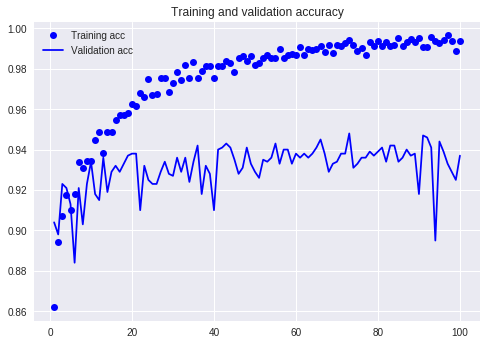

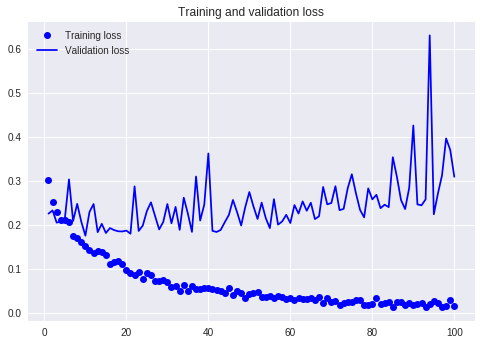

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
test_loss, test_acc = model.evaluate_generator(test_generator)
test_loss, test_acc

Found 1000 images belonging to 2 classes.


(0.35757496369236835, 0.9319999933242797)